# TV Ratings & Platform Availability

by Sarah Weinflash

<b> Data Information: </b>
- Primary Data Source: `https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney` (compiled by Ruchi Bhatia)
- Secondary Data Source: `https://www.imdb.com/search/title/` (compiled by Author)

## Overview

First, I imported the necessary packages (`pandas`, `numpy`, `matplotlib`, `seaborn`, and `sklearn`) as well as the primary dataset (`tv_shows.csv`).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
tvshows = pd.read_csv('tv_shows.csv', index_col=2)

Next, I gathered basic information on the data: the variable names, number of non-null values, data types, and appearance of the first few instances. 

In [14]:
tvshows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5368 entries, Breaking Bad to Fearless Adventures with Jack Randall
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Year             5368 non-null   int64 
 3   Age              3241 non-null   object
 4   IMDb             4406 non-null   object
 5   Rotten Tomatoes  5368 non-null   object
 6   Netflix          5368 non-null   int64 
 7   Hulu             5368 non-null   int64 
 8   Prime Video      5368 non-null   int64 
 9   Disney+          5368 non-null   int64 
 10  Type             5368 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 503.2+ KB


In [15]:
tvshows.head()

,Unnamed: 0,ID,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
Title,,,,,,,,,,,
Breaking Bad,0,1,2008,18+,9.4/10,100/100,1,0,0,0,1
Stranger Things,1,2,2016,16+,8.7/10,96/100,1,0,0,0,1
Attack on Titan,2,3,2013,18+,9.0/10,95/100,1,1,0,0,1
Better Call Saul,3,4,2015,18+,8.8/10,94/100,1,0,0,0,1
Dark,4,5,2017,16+,8.8/10,93/100,1,0,0,0,1


Then, I found the unique values of variables `Age`, `Type`, and `Year`.

In [1]:
print('Unique Values of Age: ', tvshows['Age'].unique())
print('Unique Values of Type: ', tvshows['Type'].unique())
print('Unique Values of Year: ', np.sort((tvshows['Year'].unique())))

NameError: name 'tvshows' is not defined

<b>Initial Findings</b>: 
- There are 5368 rows.
- `Age` & `IMDb Ratings` have null values.
- `Rotten Tomatoes` & `IMDb` are objects, rather than integers.
- `Rotten Tomatoes` & `IMDb` are in different scales.
- `Age` is an object with 5 unique values: `all`,`7+`,`13+`,`16+`, and `18+`
- There is only one value of `Type`.
- `Year` ranges from 1904 to 2021, with years being inconsistent before 1951.

# Data Cleaning & Transformation

I began by importing the secondary dataset, which counts the total number of TV shows produced in each decade.

In [17]:
tvyears_index = [0, 1, 2, 3, 4, 5, 6, 7, 8]
tvyears_val = [593, 3975, 6626, 7988, 11229, 19606, 42465, 95272, 33454]
tvyears_dec = ['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
tvyears_col = ['Years', 'Values']
tvyears = pd.DataFrame(tvyears_index)
tvyears['Value'] = tvyears_val
tvyears['Decade'] = tvyears_dec

Then, I created a DataFrame from the original dataset, which counts the number of TV shows by decade <i>in the dataset</i>. 

In [19]:
d40s = tvshows.loc[(tvshows.Year >= 1940) & (tvshows.Year < 1950)].count()[1]
d50s = tvshows.loc[(tvshows.Year >= 1950) & (tvshows.Year < 1960)].count()[1]
d60s = tvshows.loc[(tvshows.Year >= 1960) & (tvshows.Year < 1970)].count()[1]
d70s = tvshows.loc[(tvshows.Year >= 1970) & (tvshows.Year < 1980)].count()[1]
d80s = tvshows.loc[(tvshows.Year >= 1980) & (tvshows.Year < 1990)].count()[1]
d90s = tvshows.loc[(tvshows.Year >= 1990) & (tvshows.Year < 2000)].count()[1]
d00s = tvshows.loc[(tvshows.Year >= 2000) & (tvshows.Year < 2010)].count()[1]
d10s = tvshows.loc[(tvshows.Year >= 2010) & (tvshows.Year < 2020)].count()[1]
d20s = tvshows.loc[(tvshows.Year >= 2020) & (tvshows.Year < 2030)].count()[1]

datatvyears_index = [0, 1, 2, 3, 4, 5, 6, 7, 8]
datatvyears_val = [d40s, d50s, d60s, d70s, d80s, d90s, d00s, d10s, d20s]
datatvyears_dec = ['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
datatvyears_col = ['Years', 'Values']
datatvyears = pd.DataFrame(datatvyears_index)
datatvyears['Value'] = datatvyears_val
datatvyears['Decade'] = datatvyears_dec

The `Ratings` columns needed to be transformed from strings to floats. I did this by dropping everything but the first three items in the `IMDb Ratings` variable, and dropping everything but the first two items in the `Rotten Tomatoes Ratings` variable. Because there were two values in the `Rotten Tomatoes Ratings` variable with rating 100/100, I replaced them with the accurate rating of 100. Then, I converted both variables from strings to floats.

In [20]:
tvshows['IMDb'] = tvshows['IMDb'].str[0:3]
tvshows['Rotten Tomatoes'] = tvshows['Rotten Tomatoes'].str[0:2] 

In [21]:
tvshows.loc[tvshows['Rotten Tomatoes']=='100/100']
tvshows['Rotten Tomatoes'][0] = 100
tvshows['Rotten Tomatoes'][1950] = 100

/var/folders/m_/bn7_5xgd5k78dxpv8nsvb1r00000gn/T/ipykernel_40265/2013018640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows['Rotten Tomatoes'][0] = 100
/var/folders/m_/bn7_5xgd5k78dxpv8nsvb1r00000gn/T/ipykernel_40265/2013018640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows['Rotten Tomatoes'][1950] = 100


In [22]:
tvshows = tvshows.astype({'IMDb':'float'})
tvshows = tvshows.astype({'Rotten Tomatoes':'float'})

Next, I created a standardized variable for `IMDb`, which measured IMDb ratings out of 100, rather than 10, so they could be compared to the ratings from `Rotten Tomatoes` on the same scale. I also created a new `Average Ratings` column, which averaged the `Standardized IMDb Ratings` and the `Rotten Tomatoes Ratings` for each TV show. 

In [ ]:
sIMDb = []
for i in range(len(tvshows['IMDb'])):
    sIMDb.append(10* tvshows['IMDb'][i])

tvshows['sIMDB'] = sIMDb

In [ ]:
rating = []
for i in range(len(tvshows['Rotten Tomatoes'])):
    rating.append(((tvshows['Rotten Tomatoes'][i]) + (10* tvshows['IMDb'][i]))/2)

tvshows['Rating'] = rating

I dropped the first `Index` variable as well as the `ID` variable, as these were of no use to my analysis. I also dropped the `Type` variable, as it contained only one value, and therefore did not provide any additional, useful information.  

In [23]:
tvshows = tvshows.loc[:, ~tvshows.columns.str.contains('^Unnamed')]
tvshows.drop('ID', axis=1, inplace=True)
tvshows.drop('Type', axis=1, inplace=True)

Finally, I created a new, filtered DataFrame without any NaN values. I will use this when analyzing variables with NaN values as necessary. The first few values of the clean DataFrame are below. 

In [26]:
tvshows_filtered = tvshows.dropna()

In [27]:
tvshows.head()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,sIMDB,Rating
Title,,,,,,,,,,
Breaking Bad,2008,18+,9.4,100.0,1,0,0,0,94.0,97.0
Stranger Things,2016,16+,8.7,96.0,1,0,0,0,87.0,91.5
Attack on Titan,2013,18+,9.0,95.0,1,1,0,0,90.0,92.5
Better Call Saul,2015,18+,8.8,94.0,1,0,0,0,88.0,91.0
Dark,2017,16+,8.8,93.0,1,0,0,0,88.0,90.5


<b>Data Cleaning & Transformation Outcomes</b>: 
- `tvyears` (dataset):  tv shows produced each decade
- `datatvyears` (dataset): tv shows in the dataset produced each decade
- `IMDb` (variable): transformed from string to float
- `Rotten Tomatoes` (variable): transformed from string to float
- `ID` (variable): dropped
- `Type` (variable): dropped
- `sIMDb` (variable): standardizes the Rating system between `IMDb` and `Rotten Tomatoes``
- `Rating` (variable):  an average of `sIMDb` and `Rotten Tomatoes`
- `tvshows_filtered` (dataset): removes all NA values

# Data Analysis

Below, I found the summary values for `Year`, `IMDb Rating`, `Rotten Tomatoes Rating`, and `Average Rating`. 

The following variables may have some skew:
- `Year`: the average (`2012`) is less than the median (`2016`)
- `IMDb Ratings`: the average (`7.1`) is less than the median (`7.3`)
- `Rotten Tomatoes Ratings`: the average (`47.2`) is less than the median (`48.0`)

In [101]:
#Summary Values

print('Minimum Year: ', min(tvshows['Year']))
print('Maximum Year: ', max(tvshows['Year']))
print('Average Year: ', tvshows['Year'].mean())
print('Most Common Year: ', tvshows['Year'].mode())
print('Median Year: ', tvshows['Year'].quantile(), '\n')

print('Minimum IMDb Rating: ', min(tvshows['IMDb']))
print('Maximum IMDb Rating: ', max(tvshows['IMDb']))
print('Average IMDb Rating: ', tvshows['IMDb'].mean())
print('Most Common IMDb Rating: ', tvshows['IMDb'].mode())
print('Median IMDb Rating: ', tvshows['IMDb'].quantile(), '\n')

print('Minimum Rotten Tomatoes Rating: ', min(tvshows['Rotten Tomatoes']))
print('Maximum Rotten Tomatoes Rating: ', max(tvshows['Rotten Tomatoes']))
print('Average Rotten Tomatoes Rating: ', tvshows['Rotten Tomatoes'].mean())
print('Most Common Rotten Tomatoes Rating: ', tvshows['Rotten Tomatoes'].mode())
print('Median Rotten Tomatoes Rating: ', tvshows['Rotten Tomatoes'].quantile(), '\n')

print('Minimum Rating: ', min(tvshows['Rating']))
print('Maximum Rating: ', max(tvshows['Rating']))
print('Average Rating: ', tvshows['Rating'].mean())
print('Most Common Rating: ', tvshows['Rating'].mode())
print('Median Rating: ', tvshows['Rating'].quantile())

Minimum Year:  1904
Maximum Year:  2021
Average Year:  2012.6287257824142
Most Common Year:  0    2017
Name: Year, dtype: int64
Median Year:  2016.0 

Minimum IMDb Rating:  1.1
Maximum IMDb Rating:  9.6
Average IMDb Rating:  7.0860190649114845
Most Common IMDb Rating:  0    7.4
Name: IMDb, dtype: float64
Median IMDb Rating:  7.3 

Minimum Rotten Tomatoes Rating:  10.0
Maximum Rotten Tomatoes Rating:  100.0
Average Rotten Tomatoes Rating:  47.22038002980626
Most Common Rotten Tomatoes Rating:  0    10.0
Name: Rotten Tomatoes, dtype: float64
Median Rotten Tomatoes Rating:  48.0 

Minimum Average Rating:  23.5
Maximum Average Rating:  97.0
Average Rating:  62.3348842487517
Most Common Rating:  0    61.5
1    63.0
Name: Rating, dtype: float64
Median Average Rating:  62.0


I regressed `Year` against `Average Rating`, and found that there was not much of a relationship. The slope of -0.07 shows that for every increase in `Year`, the `Average Rating` decreases by 0.07. The R-Square value of 0.005 indicates that the variation in `Year` accounts for 0.5% of variation in `Average Rating`. 

In [32]:
year = np.array(tvshows_filtered['Year']).reshape(-1,1)
rating = np.array(tvshows_filtered['Rating']).reshape(-1,1)

model = LinearRegression()
model.fit(year, rating)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
rsquare = model.score(year, rating)
print('rsquare: ', rsquare)

intercept: [207.53800466]
slope: [[-0.07109126]]
rsquare:  0.0046219056121447055


I regressed `IMDb Ratings` against `Rotten Tomatoes Ratings`, and found that there was a weak, positive relationship. The slope of 6.55 shows that for every increase in `IMDb Rating`, the `Rotten Tomatoes Rating` increases by 6.55. The R-Square value of 0.267 indicates that the variation in `IMDb Ratings` accounts for 26.7% of variation in `Rotten Tomatoes Ratings`. 

In [33]:
#IMDb by Rotten Tomatoes Regression Line

IMDb = np.array(tvshows_filtered['IMDb']).reshape(-1,1)
RT = np.array(tvshows_filtered['Rotten Tomatoes']).reshape(-1,1)

model = LinearRegression()
model.fit(IMDb, RT)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
rsquare = model.score(IMDb, RT)
print('rsquare: ', rsquare)

intercept: [10.93828053]
slope: [[6.55182075]]
rsquare:  0.26731662471383877


I regressed availability on `Netflix` against availability on `Hulu`, `Prime Video`, and `Disney+`, and found that there was a weak, negative relationship. 
- The slope of -0.496 for `Hulu` shows that for every TV show available on `Netflix`, its availability `Hulu` decreases by -0.496. Because these are binary variables, availability on `Netflix` indicates an approximately 50% decrease in likelihood that the TV show will be available on `Hulu`. 
- The slope of -0.289 for `Prime Video` shows that for every TV show available on `Netflix`, its availability `Prime Video` decreases by -0.289. Because these are binary variables, availability on `Netflix` indicates an approximately 30% decrease in likelihood that the TV show will be available on `Prime Video`. 
- The slope of -0.123 for `Disney+` shows that for every TV show available on `Netflix`, its availability `Disney+` decreases by -0.123. Because these are binary variables, availability on `Netflix` indicates an approximately 10% decrease in likelihood that the TV show will be available on `Disney+`. 

The R-Square value of 0.139 indicates that the variation in availability on `Netflix` accounts for 13.9% of variation in availability on `Hulu`, `Prime Video`, and `Disney+`. 

In [38]:
netflix = np.array(tvshows_filtered['Netflix']).reshape(-1,1)
platforms = np.array(tvshows_filtered[['Hulu','Prime Video','Disney+']])

model = LinearRegression()
model.fit(netflix, platforms)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
rsquare = model.score(netflix, platforms)
print('rsquare: ', rsquare)

intercept: [0.58359957]
slope: [[-0.4963159]]
rsquare:  0.2542678376139872


I regressed `Average Ratings` against availability on `Netflix`, `Hulu`, `Prime Video`, and `Disney+`, and found that there was not much of a relationship. The slopes of around 0 indicate that, for every increase in `Average Rating`, the availability on `Netflix`, `Hulu`, `Prime Video`, and `Disney+` does not change. The R-Square value of 0.003 indicates that the variation in `Average Ratings` accounts for 0.3% of variation in availability on `Netflix`, `Hulu`, `Prime Video`, and `Disney+`.

In [78]:
rating = np.array(tvshows_filtered['Rating']).reshape(-1,1)
platforms = np.array(tvshows_filtered[['Netflix','Hulu','Prime Video','Disney+']])

model = LinearRegression()
model.fit(rating, platforms)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
rsquare = model.score(rating, platforms)
print('rsquare: ', rsquare)

intercept: [0.29446107 0.1307726  0.24466095 0.18916289]
slope: [[ 0.00185942]
 [ 0.0038314 ]
 [-0.00016739]
 [-0.00169015]]
rsquare:  0.0033599041699116927


Finally, I tested the statistical significance of the number of TV shows availability for each `Age Group`. Given a significance level of 0.05, and a p-value of nearly zero, I can conclude that there is a statistically significant relationship between the `Age Group` and the availability of TV shows. That is, the availability of TV shows for a given `Age Group` is unlikely to be random. 

In [86]:
from scipy.stats import chisquare
ans = chisquare(f_obs = tvshows['Age'].value_counts())
print('p-value: ', ans[1])

p-value:  1.0698132151813354e-203


<b>Data Analysis Findings</b>: 
- `IMDb Ratings` are higher on average than `Rotten Tomatoes` Ratings
- There does not appear to be a relationship between:
    - `Year` and `Rating`
    - `Rating` and `Platform Availability`
- There is a weak positive relationship between:
     - Ratings on `IMDb` and `Rotten Tomatoes`
- There is a weak negative relationship between:
    - availability on `Netflix` and `Hulu`
    - availability on `Netflix` and `Prime Video`
    - availability on `Netflix` and `Disney+`
- There appears to be a statistically significant difference in the number of tv shows produced for each `Age Group`

# Data Visualization
## Histograms

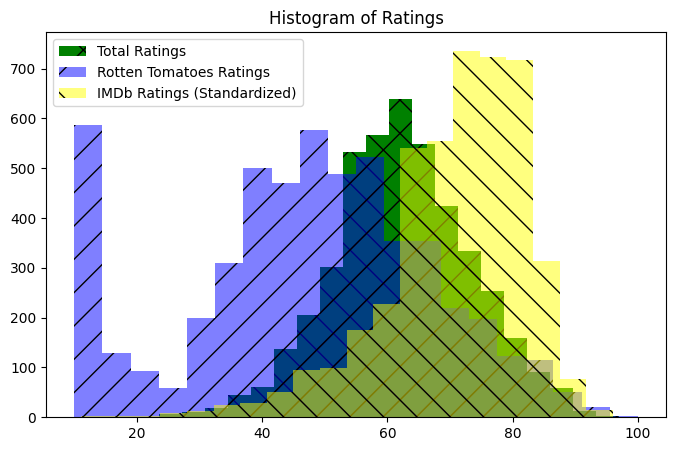

In [15]:
#STAR
#Histogram  
    #Ratings
plt.figure(figsize=(8,5))
plt.hist(tvshows['Rating'], bins=20, label='Total Ratings', color='green', hatch='X')
plt.hist(tvshows['Rotten Tomatoes'], bins=20, alpha = 0.5, color='blue', hatch='/',label='Rotten Tomatoes Ratings')
plt.hist(tvshows['sIMDB'], alpha = 0.5, bins=20, color='yellow', hatch="\\", label='IMDb Ratings (Standardized)')
plt.title('Histogram of Ratings')
plt.legend()
plt.show()

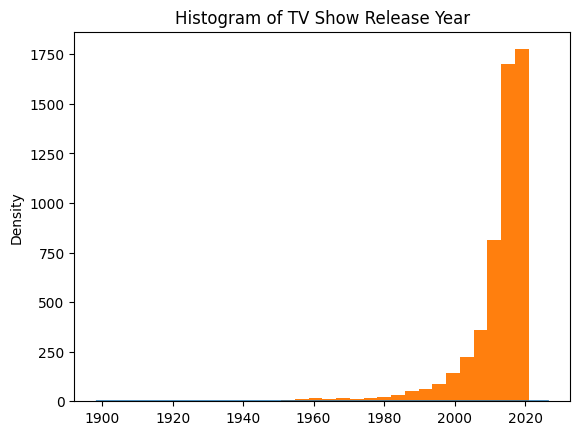

In [16]:
#Histogram 
    #Year 
sns.kdeplot(np.array(tvshows['Year']))
plt.hist(tvshows['Year'], bins=30)
plt.title('Histogram of TV Show Release Year')
plt.show()

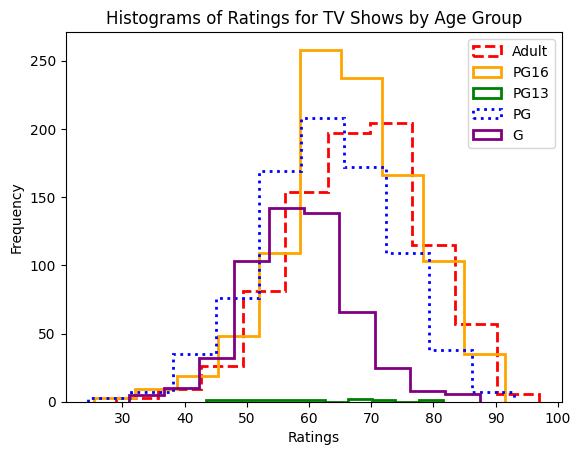

In [17]:
#STAR
#Histogram
    #Ratings by Platform

Adult = tvshows.loc[tvshows.Age == '18+']['Rating']
PG16 = tvshows.loc[tvshows.Age == '16+']['Rating']
PG13 = tvshows.loc[tvshows.Age == '13+']['Rating']
PG = tvshows.loc[tvshows.Age == '7+']['Rating']
G = tvshows.loc[tvshows.Age == 'all']['Rating']
labels = ['18+', '16+', '13+', '7+', 'All']

plt.hist(Adult, color='red', linestyle='dashed', linewidth=2, histtype='step', label='Adult')
plt.hist(PG16, color='orange', linewidth=2, histtype='step', label='PG16')
plt.hist(PG13, color='green', linewidth=2, histtype='step', label='PG13')
plt.hist(PG, color='blue', linestyle='dotted', linewidth=2, histtype='step', label='PG')
plt.hist(G, color='purple', linewidth=2, histtype='step', label='G')

plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histograms of Ratings for TV Shows by Age Group')
plt.legend()
plt.show()

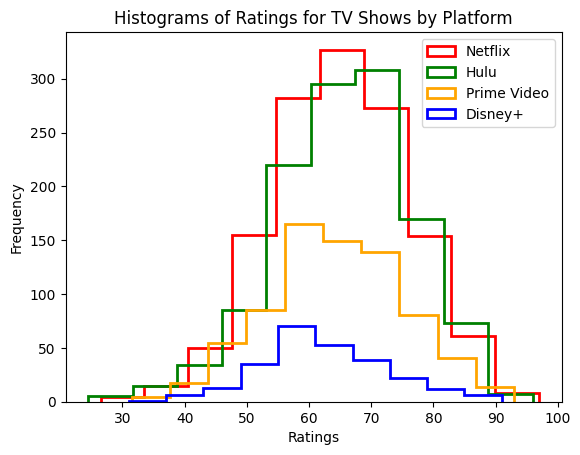

In [13]:
#STAR
#Histogram
    #Ratings by Age Group

Netflix = tvshows_filtered.loc[tvshows.Netflix == 1]['Rating']
Hulu = tvshows_filtered.loc[tvshows.Hulu == 1]['Rating']
Prime = tvshows_filtered.loc[tvshows['Prime Video'] == 1]['Rating']
Disney = tvshows_filtered.loc[tvshows['Disney+'] == 1]['Rating']

plt.hist(Netflix, color='red', linewidth=2,  histtype='step', label='Netflix')
plt.hist(Hulu, color='green', linewidth=2, histtype='step', label='Hulu')
plt.hist(Prime, color='orange', linewidth=2, histtype='step', label='Prime Video')
plt.hist(Disney, color='blue', linewidth=2, histtype='step', label='Disney+')

plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histograms of Ratings for TV Shows by Platform')
plt.legend()
plt.show()

<b>`Histogram Findings`</b>: 
- ``
- ``
- ``

## Scatterplot

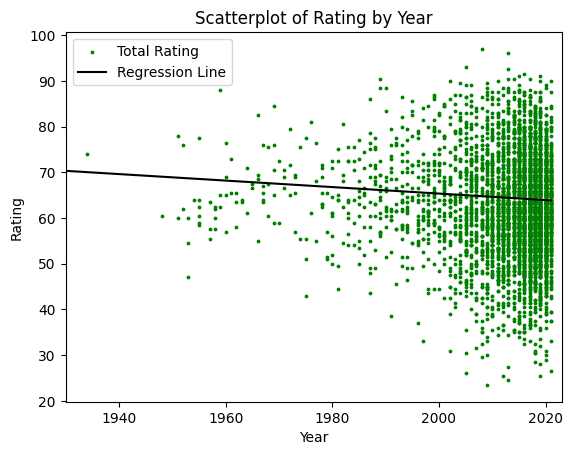

In [85]:
#Scatterplot 
#Rating by Year
plt.scatter(tvshows['Year'],tvshows['Rating'], 3, color='green', label='Total Rating')
plt.plot(tvshows['Year'],  207.53800466 + (-0.07109126 * tvshows['Year']), 'black', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xlim([1930,2023])
plt.title('Scatterplot of Rating by Year')
plt.legend()
plt.show()

In [81]:
npyr = np.array(tvshows_filtered['Year']).reshape(-1,1)
nprat = np.array(tvshows_filtered['Rating']).reshape(-1,1)

model = LinearRegression()
model.fit(npyr, nprat)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: [207.53800466]
slope: [[-0.07109126]]


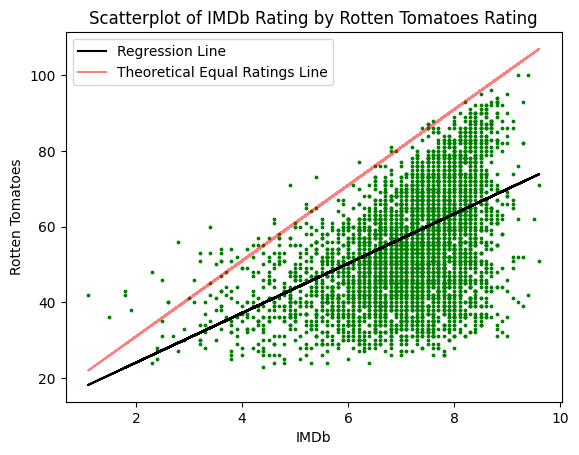

In [28]:
#Scatterplot 
#IMDb by Rotten Tomatoes
plt.scatter(tvshows['IMDb'],tvshows['Rotten Tomatoes'], 3, color='green')
plt.plot(tvshows['IMDb'],  10.93828053 + (6.55182075 * tvshows['IMDb']), 'black', label='Regression Line')
plt.plot(tvshows['IMDb'],  10.93828053 + (10*tvshows['IMDb']), 'red', alpha=0.5, label='Theoretical Equal Ratings Line')
plt.xlabel('IMDb')
plt.ylabel('Rotten Tomatoes')
plt.title('Scatterplot of IMDb Rating by Rotten Tomatoes Rating')
plt.legend()
plt.show()

In [19]:
#IMDb by Rotten Tomatoes Regression Line

IMDb = np.array(tvshows_filtered['IMDb']).reshape(-1,1)
RT = np.array(tvshows_filtered['Rotten Tomatoes']).reshape(-1,1)

model = LinearRegression()
model.fit(IMDb, RT)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: [10.93828053]
slope: [[6.55182075]]


<b>`Scatterplot Findings`</b>: 
- ``
- ``
- ``

## Boxplots & Violin Plots

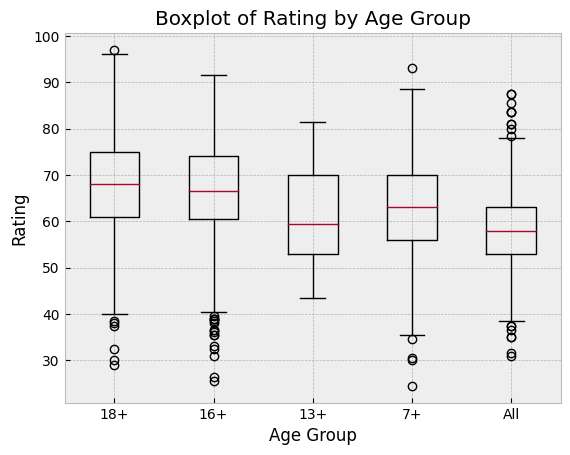

In [52]:
#Boxplot 
#Rating by Age Group

Adult = tvshows_filtered.loc[tvshows.Age == '18+']['Rating']
PG16 = tvshows_filtered.loc[tvshows.Age == '16+']['Rating']
PG13 = tvshows_filtered.loc[tvshows.Age == '13+']['Rating']
PG = tvshows_filtered.loc[tvshows.Age == '7+']['Rating']
G = tvshows_filtered.loc[tvshows.Age == 'all']['Rating']
labels = ['18+', '16+', '13+', '7+', 'All']

plt.boxplot([Adult, PG16, PG13, PG, G], labels=labels)
plt.xlabel('Age Group')
plt.ylabel('Rating')
plt.title('Boxplot of Rating by Age Group')
plt.show()

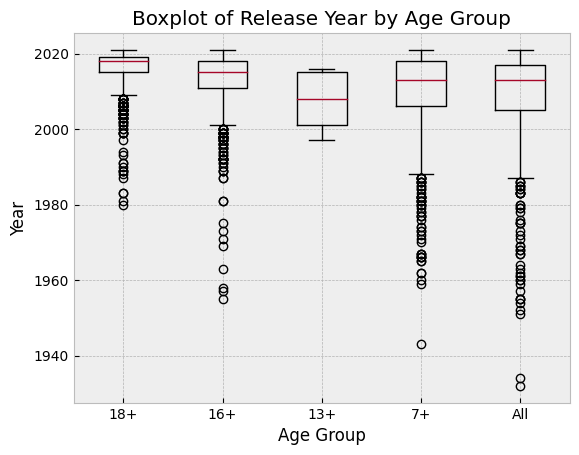

In [55]:
#Boxplot
#Year Released by Age Group

Adult = tvshows.loc[tvshows.Age == '18+']['Year']
PG16 = tvshows.loc[tvshows.Age == '16+']['Year']
PG13 = tvshows.loc[tvshows.Age == '13+']['Year']
PG = tvshows.loc[tvshows.Age == '7+']['Year']
G = tvshows.loc[tvshows.Age == 'all']['Year']
labels = ['18+', '16+', '13+', '7+', 'All']

plt.boxplot([Adult, PG16, PG13, PG, G], labels=labels)
plt.xlabel('Age Group')
plt.ylabel('Year')
plt.xticks(ticks=[1,2,3,4,5], label=labels)
plt.title('Boxplot of Release Year by Age Group')
plt.show()

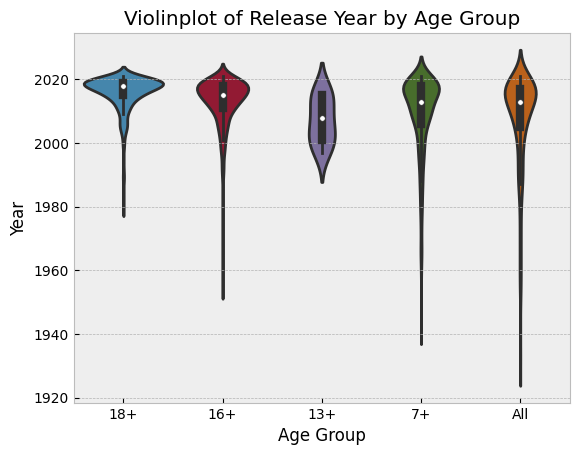

In [53]:
#Violinplot
    #Release Year by Age Group

Adult = tvshows.loc[tvshows.Age == '18+']['Year']
PG16 = tvshows.loc[tvshows.Age == '16+']['Year']
PG13 = tvshows.loc[tvshows.Age == '13+']['Year']
PG = tvshows.loc[tvshows.Age == '7+']['Year']
G = tvshows.loc[tvshows.Age == 'all']['Year']
labels = ['18+', '16+', '13+', '7+', 'All']

sns.violinplot([Adult, PG16, PG13, PG, G])
#plt.boxplot([Adult, PG16, PG13, PG, G], labels=labels)
plt.xlabel('Age Group')
plt.ylabel('Year')
plt.title('Violinplot of Release Year by Age Group')
plt.xticks(ticks=[0,1,2,3,4], labels=labels)
plt.show()

In [54]:
PG13.count()

9

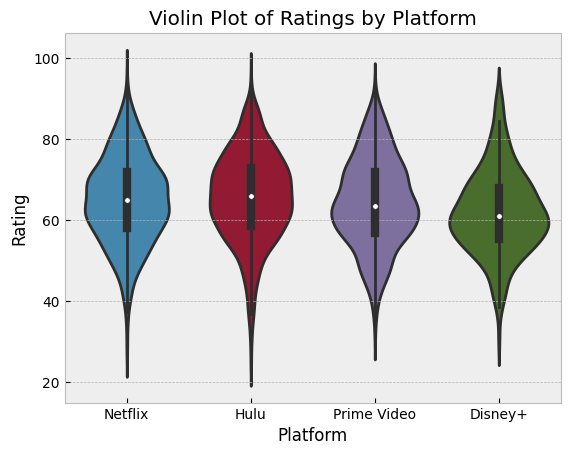

In [51]:
#Violinplot
    #Platform by Rating
    
Netflix = tvshows_filtered.loc[tvshows.Netflix == 1]['Rating']
Hulu = tvshows_filtered.loc[tvshows.Hulu == 1]['Rating']
Prime = tvshows_filtered.loc[tvshows['Prime Video'] == 1]['Rating']
Disney = tvshows_filtered.loc[tvshows['Disney+'] == 1]['Rating']
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

sns.violinplot([Netflix, Hulu, Prime, Disney])
plt.xlabel('Platform')
plt.ylabel('Rating')
plt.title('Violin Plot of Ratings by Platform')
plt.xticks(ticks=[0,1,2,3], labels=labels)
plt.show() 

<b>Boxplot & Violinplot Findings</b>: 
- blah

## Pie Chart

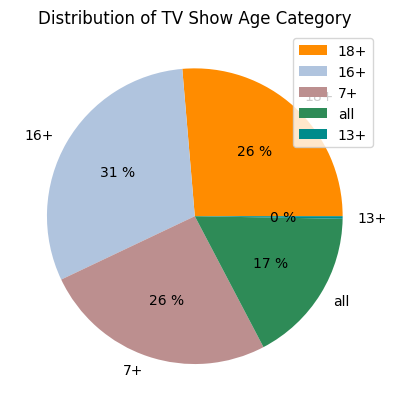

In [25]:
#Pie Chart
    #Age Category by Count

age_counts = tvshows['Age'].value_counts(sort=False)
labels = ['18+', '16+', '7+', 'all', '13+']
plt.pie(age_counts, labels=labels, autopct='%.0f %%', colors=['darkorange','lightsteelblue','rosybrown', 'seagreen', 'darkcyan'])
plt.title('Distribution of TV Show Age Category')
plt.legend()
plt.show()

18+    482
16+    384
7+     299
all    176
13+      3
Name: Age, dtype: int64
18+    261
7+     325
16+    501
13+      6
all    124
Name: Age, dtype: int64
7+     213
18+    164
16+    208
all    173
13+      2
Name: Age, dtype: int64
7+     109
all    129
16+     21
18+      2
Name: Age, dtype: int64


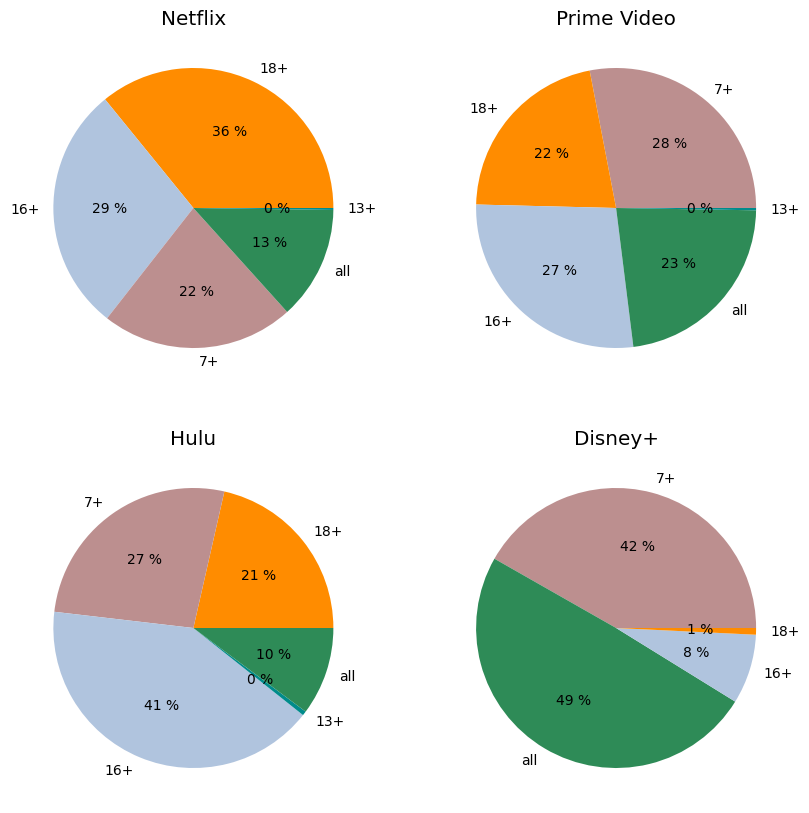

In [18]:
#Pie Chart
    #Platform by Age Count

netflix_count = tvshows.loc[tvshows.Netflix==1]
hulu_count = tvshows.loc[tvshows.Hulu==1]
prime_count = tvshows.loc[tvshows['Prime Video']==1]
disney_count = tvshows.loc[tvshows['Disney+']==1]

netflix_agecounts = netflix_count['Age'].value_counts(sort=False)
hulu_agecounts = hulu_count['Age'].value_counts(sort=False)
prime_agecounts = prime_count['Age'].value_counts(sort=False)
disney_agecounts = disney_count['Age'].value_counts(sort=False)

#find correct label order
print(netflix_agecounts)
print(hulu_agecounts)
print(prime_agecounts)
print(disney_agecounts)

#chart
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes[0,0].pie(netflix_agecounts, labels=['18+','16+','7+','all','13+'], autopct='%.0f %%', colors=['darkorange','lightsteelblue','rosybrown', 'seagreen', 'darkcyan'])
axes[0,0].set_title('Netflix')
axes[1,0].pie(hulu_agecounts, labels=['18+','7+','16+','13+','all'], autopct='%.0f %%', colors=['darkorange','rosybrown','lightsteelblue','darkcyan','seagreen'])
axes[1,0].set_title('Hulu')
axes[0,1].pie(prime_agecounts, labels=['7+','18+','16+','all','13+'], autopct='%.0f %%', colors=['rosybrown','darkorange','lightsteelblue','seagreen','darkcyan'])
axes[0,1].set_title('Prime Video')
axes[1,1].pie(disney_agecounts, labels=['7+','all','16+','18+'], autopct='%.0f %%', colors=['rosybrown','seagreen','lightsteelblue','darkorange'])
axes[1,1].set_title('Disney+')
plt.show()

<b>Pie Chart Findings</b>: 
- blah

## Bar Charts

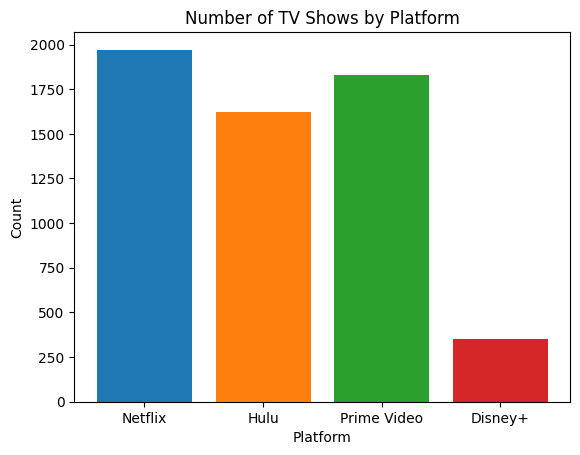

In [80]:
#Bar Chart
    #Platform by Count
    
Netflix = tvshows.loc[tvshows.Netflix == 1].count()[0]
Hulu = tvshows.loc[tvshows.Hulu == 1].count()[0]
Prime = tvshows.loc[tvshows['Prime Video'] == 1].count()[0]
Disney = tvshows.loc[tvshows['Disney+'] == 1].count()[0]

plt.bar('Netflix', Netflix)
plt.bar('Hulu', Hulu)
plt.bar('Prime Video', Prime)
plt.bar('Disney+', Disney)

plt.title('Number of TV Shows by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.style.use('bmh')

plt.show()


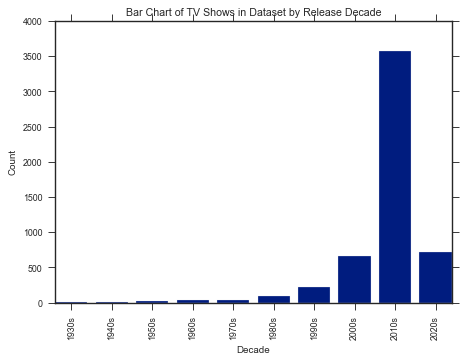

In [185]:
#Bar Chart
    #Year
    
plt.bar(datatvyears['Decade'],datatvyears['Value'])
plt.title('Bar Chart of TV Shows in Dataset by Release Decade')
plt.style.use('seaborn-v0_8-paper')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Decade')
plt.show()

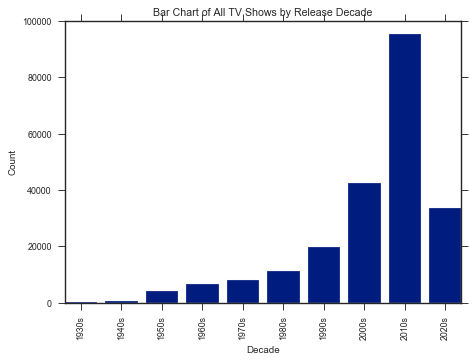

In [186]:
#Bar Chart
    #Year
plt.bar(tvyears['Decade'],tvyears['Value'])
plt.title('Bar Chart of All TV Shows by Release Decade')
plt.style.use('seaborn-v0_8-paper')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Decade')
plt.show()

<b>Bar Chart Findings</b>: 
- 